# Exploratory Data Analysis

This document performs some descriptive analytics to reveal the nature of the data that we are dealing with. It will effectively provide us some hints so as to how we should model the data and machine learning algorithm for prediction purposes respectively.<br>
**Dataset Link:** https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

In [9]:
# Importing the dependencies
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# Tweaking inline plot sizes
plt.rcParams['figure.figsize'] = [15, 6]

In [2]:
# Loading the dataset
df = pd.read_csv('../data/train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
# Checking the total number of rows and columns in the dataset
df.shape

(7352, 563)

There are 561 features, 1 identifier column indicating the volunteer ('subject') and 1 column indicating the class label ('Activity')

## 1. Quick Data Overview

#### What is the data type + number of non-null values for each column?

In [4]:
# Displaying dataframe metadata - for #rows, #cols, #non-nulls
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 563 columns):
tBodyAcc-mean()-X                       7352 non-null float64
tBodyAcc-mean()-Y                       7352 non-null float64
tBodyAcc-mean()-Z                       7352 non-null float64
tBodyAcc-std()-X                        7352 non-null float64
tBodyAcc-std()-Y                        7352 non-null float64
tBodyAcc-std()-Z                        7352 non-null float64
tBodyAcc-mad()-X                        7352 non-null float64
tBodyAcc-mad()-Y                        7352 non-null float64
tBodyAcc-mad()-Z                        7352 non-null float64
tBodyAcc-max()-X                        7352 non-null float64
tBodyAcc-max()-Y                        7352 non-null float64
tBodyAcc-max()-Z                        7352 non-null float64
tBodyAcc-min()-X                        7352 non-null float64
tBodyAcc-min()-Y                        7352 non-null float64
tBodyAcc-min()-Z        

Every feature column has a float data type with no non-null values.

#### Is there any missing data? 

In [5]:
# Checking for any null values
df.isnull().values.any()

False

#### Summary Statistics of the dataset:

In [6]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


## 2. Data Characteristics

#### After the 70%-30% train-test split, how many volunteers' data are being used for training purposes?

In [7]:
len(df.groupby('subject').size())

21

This means that 7 volunteers' worth of data has been assigned for testing purposes.

#### How much data was collected for each volunteer?

Text(0.5,1,"Total Data Acquired from Each Volunteer's Participation")

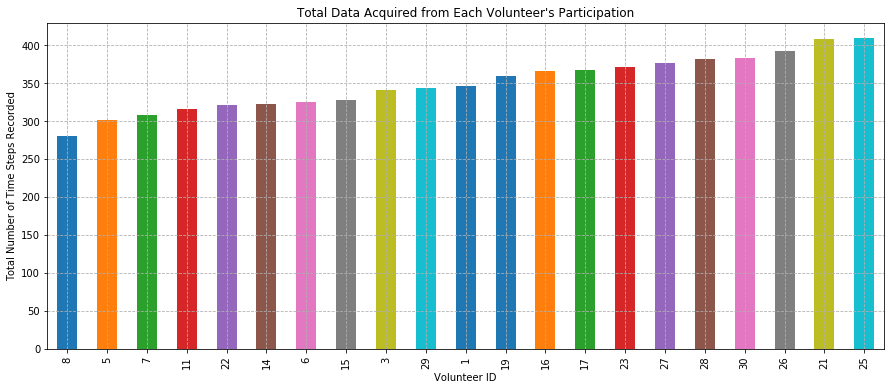

In [10]:
df.groupby('subject').size().sort_values().plot(kind='bar')
plt.grid(linestyle='--')
plt.xlabel('Volunteer ID')
plt.ylabel('Total Number of Time Steps Recorded')
plt.title('Total Data Acquired from Each Volunteer\'s Participation')

#### What is the maximum, minimum and mean number of time steps recorded throughout the experiment for a patient?

In [11]:
df.groupby('subject').size().describe()

count     21.000000
mean     350.095238
std       35.603237
min      281.000000
25%      323.000000
50%      347.000000
75%      376.000000
max      409.000000
dtype: float64

This tells us that that the number of observations recorded for each volunteer is roughly centered towards 350, and are in the range [281, 409]

#### What is the distribution of the activities, in terms of the number of time steps recorded?

Text(0,0.5,'Number of Time-Steps')

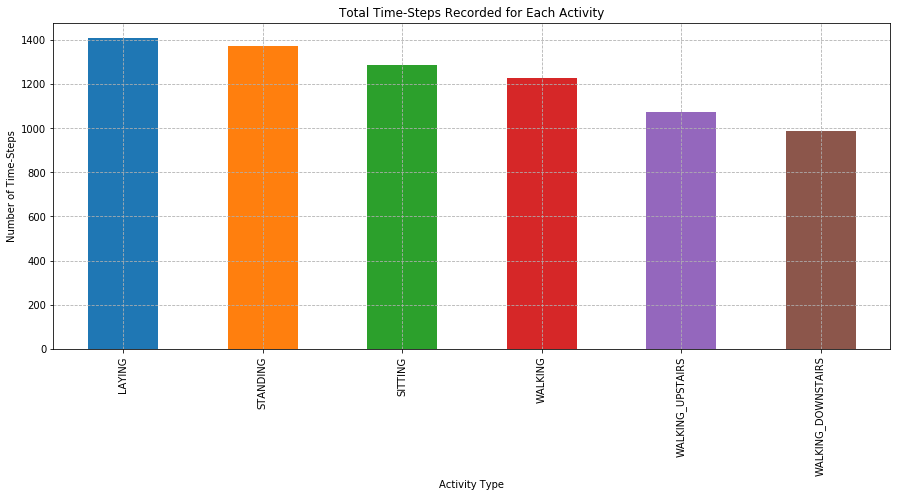

In [12]:
df["Activity"].value_counts().plot(kind='bar')
plt.grid(linestyle='--')
plt.title("Total Time-Steps Recorded for Each Activity")
plt.xlabel("Activity Type")
plt.ylabel("Number of Time-Steps")

There is a slight imbalance in the number of observations made for each class, 'laying' being the dominant activity with data collected at about 1400 recorded time steps, and 'walking downstairs' activity having the least recorded amount of data spanning across about 1000 time steps.  

#### How many time steps are recorded for each activity for the 21 patients? 

Text(0,0.5,'Overall Activity Indulgement (i.e., number of time steps)')

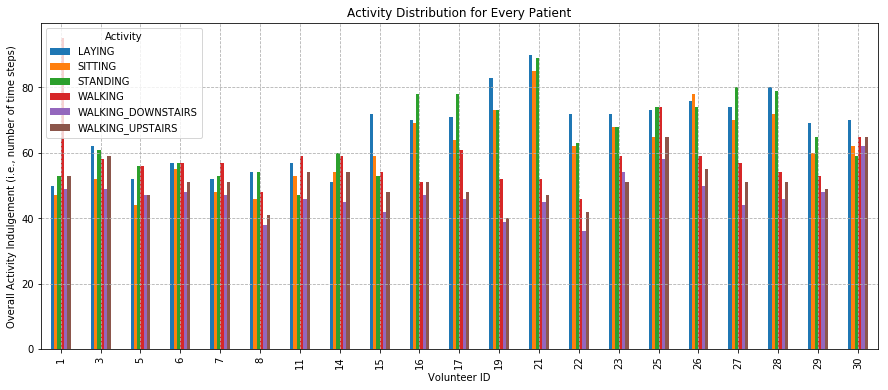

In [13]:
df.groupby(['subject', 'Activity']).size().unstack().plot(kind='bar')
plt.grid(linestyle='--')
plt.title("Activity Distribution for Every Patient")
plt.xlabel("Volunteer ID")
plt.ylabel("Overall Activity Indulgement (i.e., number of time steps)")

There seems to be 2 groups of volunteers - one group in which everyone nearly balances all of their activities, and another group in which the volunteer is a little more sedentary (i.e., laying, sitting and standing). There is no fixed size (fixed number of time steps) for recording any of the activities.

#### Finally, is the sequence length for each activity, as and when it is being recorded, the same throughout the experiment?

This requires us to note the activity changes that occur in time. A convenience column which notes these activity changes across the volunteer data samples is created and appended to the dataframe.  

In [14]:
count, volunteer_id = 1, 1 
seq_indicator = [count] 

# Record changes in the activity sequence as recorded for an volunteer 
for row in range(1,len(df)):
    if df.loc[row, 'Activity'] == df.loc[row-1, 'Activity'] and volunteer_id == df.loc[row, 'subject'] :
        seq_indicator.append(count) 
    else : 
        count, volunteer_id = count + 1, df.loc[row, 'subject'] # update the indicators 
        seq_indicator.append(count)

df.drop(columns=['sequenceInd'], inplace=True) if 'sequenceInd' in df else None # remove column if already exists while testing        
df.insert(loc=df.shape[1]-2, column='sequenceInd', value=seq_indicator)
df.loc[343:350,['sequenceInd','Activity']]        

,sequenceInd,Activity
343,15,WALKING_DOWNSTAIRS
344,15,WALKING_DOWNSTAIRS
345,15,WALKING_DOWNSTAIRS
346,15,WALKING_DOWNSTAIRS
347,16,STANDING
348,16,STANDING
349,16,STANDING
350,16,STANDING


Since the column change is recorded by the sequence indicator column, we should now be able to query the dataframe. 

Text(0,0.5,'Number of Consecutive Time Steps Recorded for Same Activity')

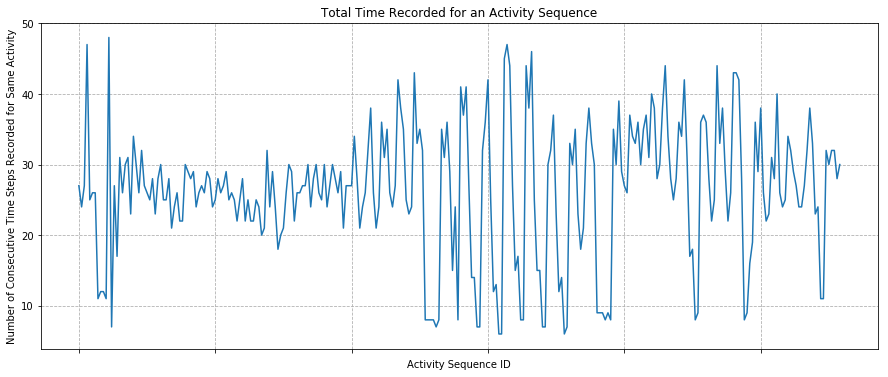

In [15]:
df.groupby(['sequenceInd', 'Activity']).size().plot(kind='line')
plt.grid(linestyle='--')
plt.title("Total Time Recorded for an Activity Sequence")
plt.xlabel("Activity Sequence ID")
plt.ylabel("Number of Consecutive Time Steps Recorded for Same Activity")

In [16]:
df.groupby(['sequenceInd', 'Activity']).size().describe()

count    280.000000
mean      26.257143
std        9.389899
min        6.000000
25%       22.000000
50%       27.000000
75%       32.000000
max       48.000000
dtype: float64

It can be inferred that, irrespective  of the activity being carried out, the sequence length (consecutive time steps recording the same activity) is unfortunately not a constant. This nonconstant variance is evident from the plot above.